# Mapping in python
*Developed by Stef Lhermitte*


## Notebook 1: setting up a mapping plot in python
In this notebook we will learn how to create a map environment in python and add geodata to these plots. Making maps is a fundamental part of geoscience research. Maps differ from regular figures in the following principle ways:
* Maps require a projection of geographic coordinates on the 3D Earth to the 2D space of your figure.
* Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)
* Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

We will use three packages that you need to install separately in your jupyter/conda environment:
* <a href="https://scitools.org.uk/cartopy/docs/latest/" target="_blank">Cartopy</a>: a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.
* <a href="" target="_blank">Matplotlib-scalbar</a>: a Python package designed for adding scalebars to figures and maps.
* <a href="https://osmnx.readthedocs.io/en/stable/#" target="_blank">OSMnx</a> : a Python package deisgned to download spatial geometries and model, project, visualize, and analyze street networks and other spatial data from OpenStreetMap’s APIs.

The easiest route to installing osmnx & cartopy is through conda by running the following 4 commands in your conda prompt. 

* For windows you should first launch your conda prompt. If you don't know how to launch the conda prompt in Windows check [here](https://docs.anaconda.com/anaconda/install/verify-install/#conda). Once the conda prompt is launched, you should run the following four commands in this prompt:

* For Mac you should open your terminal (Spotlight Search -> Terminal) and the you can directly run the following four commands in the terminal:

`conda create -n ox -c conda-forge python=3 osmnx`

`conda activate ox`

`conda install -c conda-forge cartopy`

`conda install -c conda-forge matplotlib-scalebar`

Once you succeeded in installing these packages, you have to switch to ox environment (see screenshot in zip).

Once this is done, these packages can be imported as normal packages as you have done in previous CTB2000 notebooks.

## Load the necessary packages

We start by importing the necessary packages

In [1]:
import cartopy.crs as ccrs
import cartopy
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
%matplotlib inline

## The earth is not flat

The surface of a sphere is topologically different to a 2D surface. Therefore, if we want to represent it in a 2D environment (e.g. screen/pag), we have to cut the sphere somewhere and this cannot be done without distortion.

There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here (check <a href="https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb" target="_blank">cartopy tutorial</a> if you want to know more). Instead we will use the available cartopy projections which can be initiliased in a variety of ways ranging from directly (check: )


#### Define a projection from it's epsg code

You can define a projection from its EPSG code (for examples see https://spatialreference.org/):

In [2]:
?ccrs.epsg
ccrs.epsg(32631)

_EPSGProjection(32631)

#### Define projection from cartopy native projections

Or directly from Cartopy's <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" target="_blank">projection list</a>. This list of native available projections tells us that the Plate Carree projection is available with: 

In [3]:
?ccrs.PlateCarree
crs_latlon = ccrs.PlateCarree()

### Drawing a map

Cartopy optionally depends upon matplotlib for plotting, and each projection knows how to create a matplotlib Axes that turn the plotting environment in a cartopy.mpl.geoaxes.GeoAxes class. This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.
We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

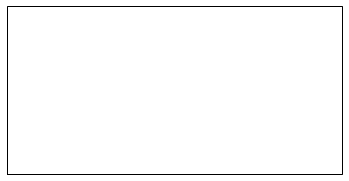

In [4]:
plt.axes(projection=ccrs.PlateCarree())

That was a little spectacular, but from the output of the previous cell, we can see that the Axes created is indeed one of those `cartopy.mpl.geoaxes.GeoAxesSubplot` instances.

### Adding GeoAxes methods

The cartopy.mpl.geoaxes.GeoAxes class adds a number of useful methods.

Some examples:

* <a href=" https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global" target="_blank">set_global</a>:  zoom the map out as much as possible
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent" target="_blank">set_extent</a>: zoom the map to the given bounding box
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html" target="_blank">gridlines</a>: add a graticule (and optionally labels) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=coastlines#cartopy.mpl.geoaxes.GeoAxes.coastlines" target="_blank">coastlines</a>: add Natural Earth coastlines to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img" target="_blank">stock_img</a>: add a low-resolution Natural Earth background image to the axes
* <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow" target="_blank">imshow</a>: add an image (numpy array) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries" target="_blank">add_geometries</a>: add a collection of geometries (Shapely) to the axes

#### Coastlines
One of the most useful methods that the `geoaxes` class adds on top of the standard matplotlib Axes class is the coastlines method. With no arguments, it will add the Natural Earth 1:110,000,000 scale coastline data to the map.

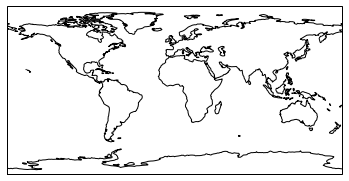

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
?ax.coastlines
ax.coastlines()

#### Stock_img
Another usefull GeoAxesSubplot methods is that we can add a downsampled version of the Natural Earth shaded relief raster to the map.

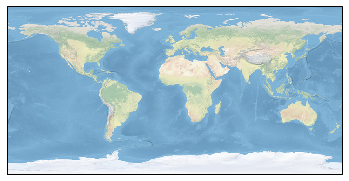

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
?ax.stock_img
ax.stock_img()

#### Gridlines
Yet another usefull GeoAxesSubplot methods is that we can add a gridlines to the map.

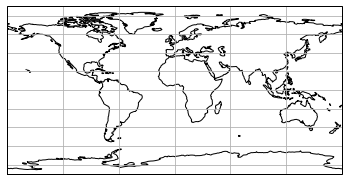

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
?ax.gridlines
ax.gridlines()

And even tune them:

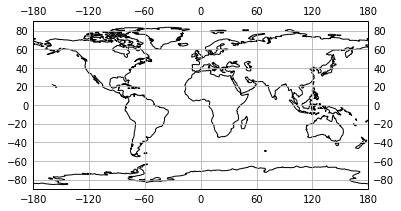

In [8]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
?ax.gridlines
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the 
`plt.subplots` function could be used:

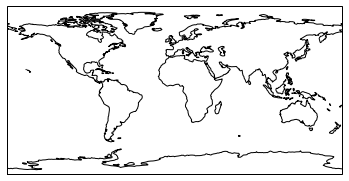

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

### Customizing projections
Projection classes have options we can use to customize the map:

In [10]:
ccrs.PlateCarree?

From the class signature, for example, we can see that we can set the 'central_longitude' (which defaults to 0.0). If we change this projection class parameter, we can change our mapping environment.

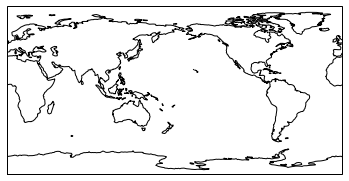

In [11]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

#### Some More Examples of Different Global Projections
If we now make a default plot for a list of cartopy projections, we can see how the Earth is represented differently for different projections.

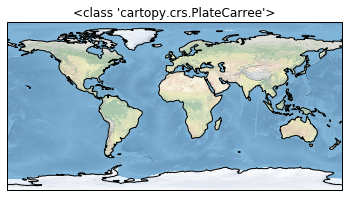

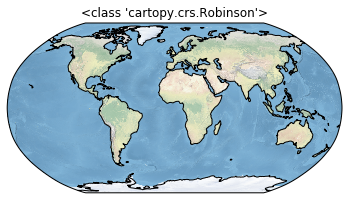

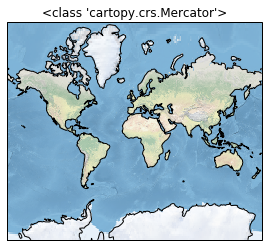

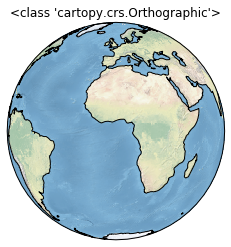

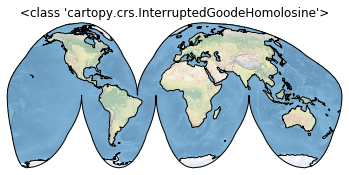

In [12]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Regional maps

If we now want to move from global to regional maps, we can use the we use the `set_extent` method of GeoAxis to limit the size of the region.

In [13]:
ax.set_extent?

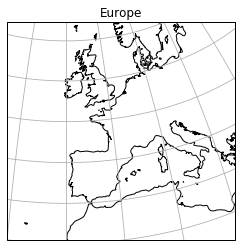

In [14]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()

#### Adding a scalebar

By using the `matplotlib-scalebar` package we can also use a scalebar to our map, where the unit of the scalebar is by default set in the unit of the 'projection' (i.e., for Orthographic `1 unit` corresponds to `1 meter`, whereas for PlateCarree which uses lat-lon coordinates `1 unit` corresponds to `1 minute`).

In [15]:
?ScaleBar

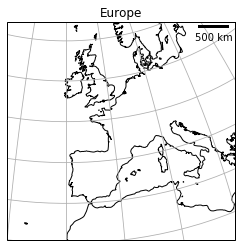

In [16]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()
scalebar = ScaleBar(1,box_alpha=0)
ax.add_artist(scalebar)

### Adding Cartopy features
To give our map more styles and details, we add `cartopy.feature` objects. Many useful features are built in. These "default features" are at coarse (110m) resolution:

* `cartopy.feature.BORDERS`:	Country boundaries
* `cartopy.feature.COASTLINE`:	Coastline, including major islands
* `cartopy.feature.LAKES`:	Natural and artificial lakes
* `cartopy.feature.LAND`:	Land polygons, including major islands
* `cartopy.feature.OCEAN`:	Ocean polygons
* `cartopy.feature.RIVERS`:	Single-line drainages, including lake centerlines
* `cartopy.feature.STATES`:	(limited to the United States at this scale)

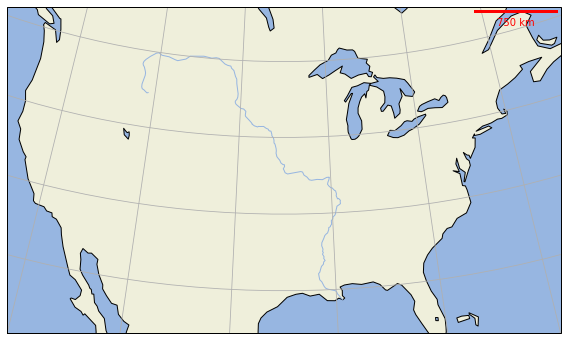

In [17]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

ax.add_artist(ScaleBar(1,box_alpha=0,color='red'))

By selecting the category and scale level, we can further tune the added features.

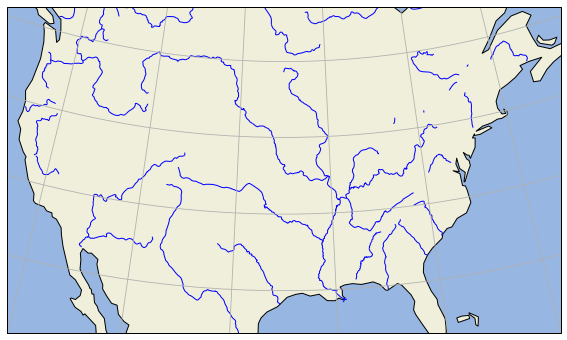

In [18]:
?cfeature.NaturalEarthFeature
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()

# Adding Data to the Map

Now that we know how to create a map, let's add our data to it! 

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots. By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

In [19]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

Key point: the data also have to be transformed to the projection space. This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object. If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

From the <a href="https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html" target="_blank">cartopy information</a>: *The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.*

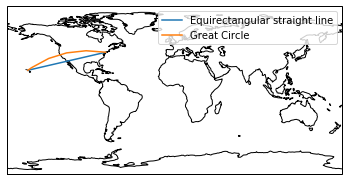

In [20]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

## Adding text and points
By using the standard `plot` and `text` plotting commands we can also annotate the map.

Text(-117, 33, 'San Diego')

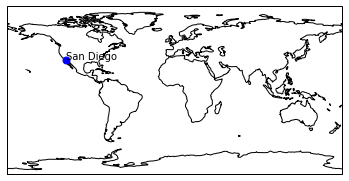

In [21]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

### Adding 2D raster data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

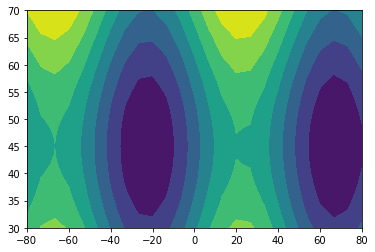

In [22]:
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any transform keyword. This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

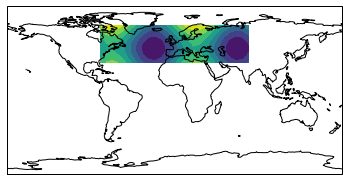

In [23]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, the data are not properly located and the plot either does not plot the data and/or plots it at the wrong location.

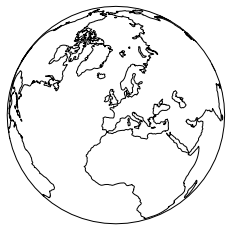

In [24]:
# projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to contourf:

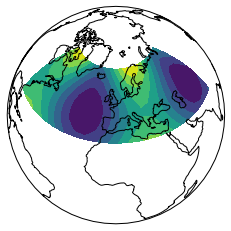

In [25]:
#projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

### Adding images

Similarly, we can easily add (satellite) image easily on a map if we know its extent. For example, we can add the satellite image (e.g. Miriam.A2012270.2050.2km.jpg in your data folder). Therefore, we have to take into account how the origin of the image is defined (i.e. for geographic data sets the origin is often the upper left corner instead of the lower left corner).

Text(-117, 33, 'San Diego')

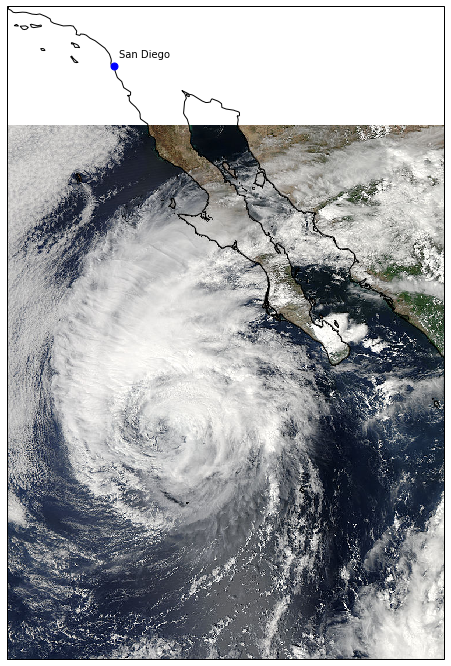

In [26]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())


# Reading data from Open Streetmap

Now that we learned how to setup a map and add data to it, we are going to try to add Open Streetmap data to our map. Therefore we will use the `osmnx` package, which is a Python package for downloading administrative boundary shapes and street networks from OpenStreetMap. It allows you to easily construct, project, visualize, and analyze complex street networks in Python with NetworkX. You can get a city’s or neighborhood’s walking, driving, or biking network with a single line of Python code. 

#### Open Streetmap
*OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. OSM has a large userbase with more than 4 million users that contribute actively on OSM by updating the OSM database with 3 million changesets per day. In total OSM contains more than 4 billion nodes that form the basis of the digitally mapped world that OSM provides. OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development (see more from Humanitarian OpenStreetMap Team (HOTOSM) website.*

`osmnx` allows you to query based on different syntaxes. For example, based on a text string:

In [27]:
?ox.graph_from_place

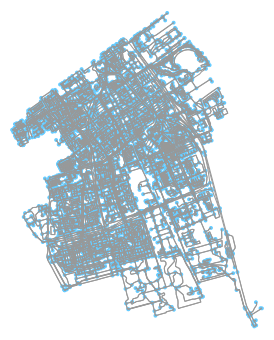

(<Figure size 558.741x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119a08f60>)

In [28]:
G = ox.graph_from_place('Delft, Netherlands')
ox.plot_graph(G)

Or from a bounding box:

In [29]:
?ox.graph_from_bbox

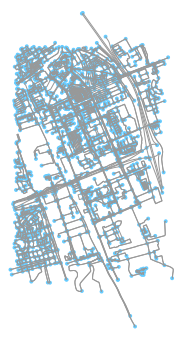

(<Figure size 364.191x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d94beb8>)

In [71]:
G = ox.graph_from_bbox(52.01,51.98,4.39,4.36,retain_all=False,truncate_by_edge=True)
ox.plot_graph(G)

#### OSM data types

In [31]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

As you can see from the previous cell: the output of these queries is a `networkx.classes.multidigraph.MultiDiGraph`. A DiGraph is a `vector` data type that stores nodes and edges with optional data, or attributes. What we can see here is that this data type belongs to a Python module called networkx that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks.

If, however, we want to implement the OSM data in our mapping environment, it might be handy to have our OSM data in a `geopandas` format, which is a pandas format but for geographical data. osmnx provides a convenient function `graph_to_gdfs()` that can convert the graph data into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edges.

In [72]:
?ox.graph_to_gdfs
nodes, edges = ox.graph_to_gdfs(G)

In [33]:
nodes.head()

,y,x,osmid,highway,ref,geometry
588029952,52.001388,4.372964,588029952,NaN,NaN,POINT (4.37296 52.00139)
1920876565,51.989617,4.375321,1920876565,NaN,NaN,POINT (4.37532 51.98962)
1920876566,51.989863,4.376985,1920876566,NaN,NaN,POINT (4.37699 51.98986)
1590140951,52.009408,4.375961,1590140951,NaN,NaN,POINT (4.37596 52.00941)
1920876568,51.989808,4.377178,1920876568,NaN,NaN,POINT (4.37718 51.98981)


In [34]:
edges.head()

,u,v,key,osmid,highway,oneway,length,geometry,name,maxspeed,bridge,lanes,service,access,ref,tunnel,width,junction
0,588029952,443383525,0,"[345198949, 37800694]","[footway, steps]",False,14.303,"LINESTRING (4.37296 52.00139, 4.37295 52.00138...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1920876565,44751599,0,431537295,unclassified,False,13.289,"LINESTRING (4.37532 51.98962, 4.37540 51.98951)",Anthony Fokkerweg,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1920876565,1591487520,0,585710868,pedestrian,False,21.638,"LINESTRING (4.37532 51.98962, 4.37561 51.98969)",Kluyverweg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1920876565,44751598,0,705268503,pedestrian,False,20.481,"LINESTRING (4.37532 51.98962, 4.37504 51.98955)",Kluyverweg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1920876565,311079155,0,705268501,unclassified,False,55.697,"LINESTRING (4.37532 51.98962, 4.37531 51.98963...",Anthony Fokkerweg,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
 type(edges)

geopandas.geodataframe.GeoDataFrame

Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before. Therefore, we just need to load the `geodataframa['geometery']` to our cartopy environment.

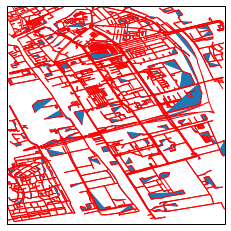

In [36]:
plt.figure()
crs=ccrs.PlateCarree()
ax = plt.axes(projection=crs)
ax.set_extent([4.36,4.39,51.98,52.01])
ax.add_geometries(edges['geometry'],crs=crs,linewidth=1, edgecolor='red')

### Query data as footprint polygons
Besides querying OSM for networkx graphs, we can also query for footprints, where footprints are polygons representing different features and where the `footprint_type` represents a OSM tag key e.g. ‘building’, ‘landuse’, ‘place’, etc.

To get an overview of potential footprints: check the [OSM webpage](https://www.openstreetmap.org/) using [Query features tool](https://blog.openstreetmap.org/2014/12/01/new-query-feature/) to identify the available OSM tag's in your area. This [OSM wiki](https://wiki.openstreetmap.org/wiki/Browsing) should provide you with the browse the OSM-webpage.

In [ ]:
lu=ox.create_footprints_gdf(north=52.01, south=51.98, east=4.39, west=4.36, footprint_type='landuse', retain_invalid=True)
lu

In [52]:
bl=ox.create_footprints_gdf(north=52.01, south=51.98, east=4.39, west=4.36, footprint_type='building', retain_invalid=True)
bl

                                                      nodes  \
32017871  [359130442, 359130443, 359130439, 359130440, 3...   
32017872  [359130445, 359130449, 359130448, 359130447, 3...   
32017873  [359130454, 359130451, 359130458, 359130456, 3...   
32045333  [2596133436, 359700458, 359700465, 2596133037,...   
32045334  [2596131368, 359700475, 359700471, 2596132675,...   
...                                                     ...   
3404946                                                 NaN   
6737536                                                 NaN   
7641905                                                 NaN   
8142969                                                 NaN   
9984474                                                 NaN   

                                                   geometry    building  \
32017871  POLYGON ((4.371 51.997, 4.371 51.997, 4.371 51...  apartments   
32017872  POLYGON ((4.372 51.997, 4.372 51.997, 4.372 51...  apartments   
32017873  POLYGON 

In [53]:
na=ox.create_footprints_gdf(north=52.01, south=51.98, east=4.39, west=4.36, footprint_type='natural', retain_invalid=True)
na

                                                      nodes  \
4960697   [44785113, 6645334828, 6645334838, 6645334833,...   
20209191  [213704305, 213704314, 5325943878, 213704313, ...   
20209387  [213707282, 213707287, 213707285, 213707284, 2...   
20209467  [213708522, 213708523, 213708524, 213708525, 2...   
32909449  [3184861391, 370623465, 1842943733, 1842943731...   
...                                                     ...   
2316492                                                 NaN   
8610590                                                 NaN   
8793503                                                 NaN   
9592505                                                 NaN   
9796016                                                 NaN   

                                                   geometry natural  \
4960697   POLYGON ((4.37692 51.99682, 4.37676 51.99678, ...   water   
20209191  POLYGON ((4.39004 52.00046, 4.38938 52.00152, ...   water   
20209387  POLYGON ((4.38884 52

In [54]:
wa=ox.create_footprints_gdf(north=52.01, south=51.98, east=4.39, west=4.36, footprint_type='waterway', retain_invalid=True)
wa

                                                       nodes  \
32351402   [364158062, 364158063, 2165480881, 364158064, ...   
32351403   [364158047, 364158048, 364158049, 5367708416, ...   
32351405   [364158052, 2165480879, 1864965035, 364158053,...   
32351413   [403411089, 364158088, 364158090, 364158092, 3...   
32351416      [1851699239, 2165480883, 364158071, 364158072]   
...                                                      ...   
707129511                           [6645334834, 6645334833]   
731108325                           [2322872939, 6847863409]   
744111541                           [6964206821, 6964206820]   
744111543                           [6964206827, 6964206826]   
2675569                                                  NaN   

                                                    geometry CEMT  \
32351402   POLYGON ((4.361 52.006, 4.363 52.006, 4.364 52...   II   
32351403   POLYGON ((4.381 51.979, 4.379 51.981, 4.377 51...   II   
32351405   POLYGON ((4.3

For some `footprint_type`'s you get an empty GeoDataFrame, which means that this data type is not present in your area of interest (e.g., no military footprints in Delft)

In [60]:
mi=ox.create_footprints_gdf(north=52.01, south=51.98, east=4.39, west=4.36, footprint_type='military', retain_invalid=True)
print(mi)

Empty GeoDataFrame
Columns: []
Index: []


Similarly, you might realize that the OSM data set is not complete (e.g. buildings are missing or all buildings in complete neighbourhoods are missing). This is inherent of the open status of OSM and the fact that it is still in development. In notebook 2-3 we will use satellite data to fill in these gaps.

#### Footpints as geopandas
The queried footprints are returned geopandas dataframes which can be processed as normal pandas dataframes. For example, we can create an array of unique values in the 'landuse' column of the lu variable by using pandas `unique` command.

In [63]:
lu['landuse'].unique()

array(['allotments', 'residential', 'industrial', 'grass',
       'recreation_ground', 'brownfield', 'forest', 'construction',
       'commercial', 'meadow', 'cemetery', 'orchard', 'retail', 'railway',
       'village_green'], dtype=object)

Or calculate the amount of footprints per 'landuse' type

In [64]:
lu['landuse'].value_counts()

grass                436
forest               218
construction          20
meadow                16
residential           12
industrial            11
allotments             3
retail                 3
cemetery               3
commercial             3
brownfield             2
recreation_ground      2
village_green          2
orchard                1
railway                1
Name: landuse, dtype: int64

In [65]:
na['water'].value_counts()

pond     6
lake     1
ditch    1
Name: water, dtype: int64

In [66]:
na['natural'].value_counts()

water        189
tree_row      38
grassland      1
wetland        1
Name: natural, dtype: int64

In [68]:
bl['building'].value_counts()

yes               3793
house             3410
apartments         146
industrial          99
construction        98
retail              90
commercial          83
office              26
university          24
houseboat            7
static_caravan       7
garage               4
roof                 4
shed                 4
school               3
residential          3
civic                2
service              1
church               1
greenhouse           1
warehouse            1
walkway              1
transportation       1
farm                 1
public               1
Name: building, dtype: int64

Based on these exploratory analyses, we can reclassify our landuse variable into subsets representing the most dominant (in polygon numbers). For example, we can subset the `lu` variable keeping only these rows where `landuse==grass`.

In [ ]:
grass=lu[lu['landuse']=='grass']

Or subset the forests

In [ ]:
forest=lu[lu['landuse']=='forest']

Or reclassify all the water from the `natural` footprints in a separate variable.

In [38]:
water=na[na['natural']=='water']

### Projecting geodata frames

The geodata frames can also be converted to any projection system.

In [40]:
?ox.project_gdf

In [41]:
grass_proj=ox.project_gdf(grass)

# Adding projected OSM to a map

Subsequently, these can be added to your own map

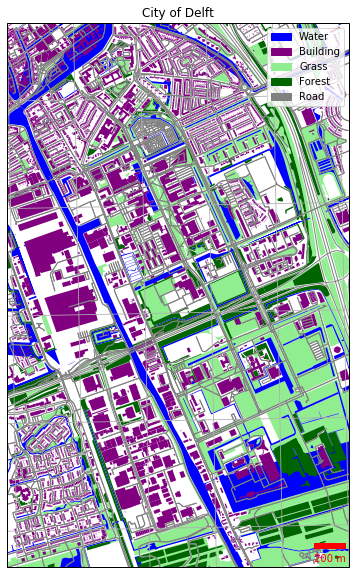

In [86]:
plt.figure(figsize=(10,10))
crs=ccrs.epsg(32631)
# crs=ccrs.Mercator(central_longitude=7.5)
ax = plt.axes(projection=crs,title='City of Delft')
ax.set_extent([4.36,4.39,51.98,52.01],crs=ccrs.PlateCarree())
# Adding the reprojected data
ax.add_geometries(grass_proj['geometry'], crs=crs, facecolor='lightgreen')

# Adding the data in the native latlon projection
ax.add_geometries(wa['geometry'], crs=ccrs.PlateCarree(), facecolor='blue')
ax.add_geometries(bl['geometry'], crs=ccrs.PlateCarree(), facecolor='purple')
ax.add_geometries(water['geometry'], crs=ccrs.PlateCarree(), facecolor='blue')
ax.add_geometries(forest['geometry'], crs=ccrs.PlateCarree(), facecolor='darkgreen')
ax.add_geometries(edges['geometry'],crs=ccrs.PlateCarree(),linewidth=1, edgecolor='grey',facecolor='None')

# Annotating plot
ax.gridlines()
scalebar = ScaleBar(1,box_alpha=0,color='red',location='lower right')
ax.add_artist(scalebar)

# Adding a legend
import matplotlib.patches as mpatches
bl_patch = mpatches.Patch(color='purple', label='Building')
wa_patch = mpatches.Patch(color='blue', label='Water')
na_patch = mpatches.Patch(color='lightgreen', label='Grass')
fo_patch = mpatches.Patch(color='darkgreen', label='Forest')
rd_patch = mpatches.Patch(color='grey',label='Road')
plt.legend(handles=[wa_patch,bl_patch,na_patch,fo_patch,rd_patch],loc='upper right')

# Exercises

For this assignment you need to plot a map over the city of interest of your group (see list of cities with groups).

* Exercise 1: setup a map over your city of interest and add the basic cartopy mapping data to it (e.g., scalebar, coastlines, gridlines, low resolution background, etc). To avoid long download times (e.g. for Open Streetmap) you may restrict this area to a smaller subset of your city.
* Exercise 2: download the Open Streetmap data over your city of interest and determine the major landcover types.
* Exercise 3: plot a map that shows for your city the major landcover types and that includes the necessary mapping elements.



To do:
* Check https://brightspace.tudelft.nl/d2l/le/content/218222/viewContent/1575545/View before you start and register your group.
* Perform the exercises. Please start for this exercise with a blank notebook that contains all the necessary code to process and compile the three exercises. 
* Upload your notebook + pdf to BrightSpace as Remote Sensing Notebook1: Mapping
* Complete the peer-review survey of your group.
